In [60]:
import  numpy as np
import  matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Loading the Data and Analysing the Data

In [61]:
df = load_iris()
data = pd.DataFrame(data=df.data, columns=df.feature_names) # Load iris dataset
data['target'] = df.target # Add target column to the dataframe
data['target_names'] = data['target'].apply(lambda x: df.target_names[x]) # Map target numbers to target names

In [62]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [63]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sepal length (cm)    150 non-null    float64
 1   sepal width (cm)     150 non-null    float64
 2   petal length (cm)    150 non-null    float64
 3   petal width (cm)     150 non-null    float64
 4   target               150 non-null    int64  
 5   target_names         150 non-null    object 
 6   target_names_mapped  150 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 8.3+ KB


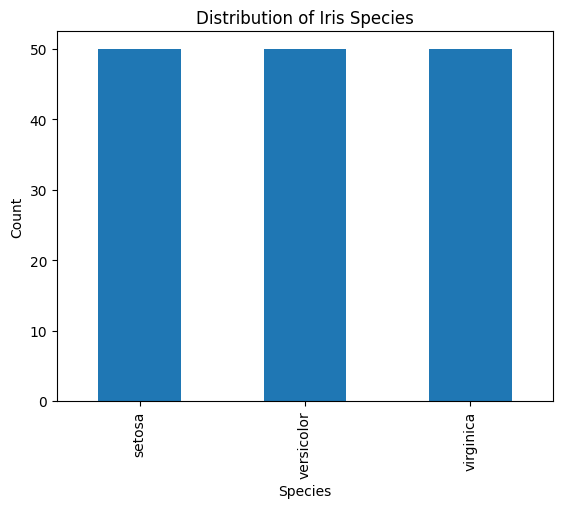

In [64]:
data['target_names'].value_counts().plot(kind='bar')
plt.xlabel('Species')
plt.ylabel('Count') 
plt.title('Distribution of Iris Species')
plt.show()

Data Preprocessing

In [40]:
data.isnull().sum() # Check for missing values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_names         0
dtype: int64

Exploring the Data

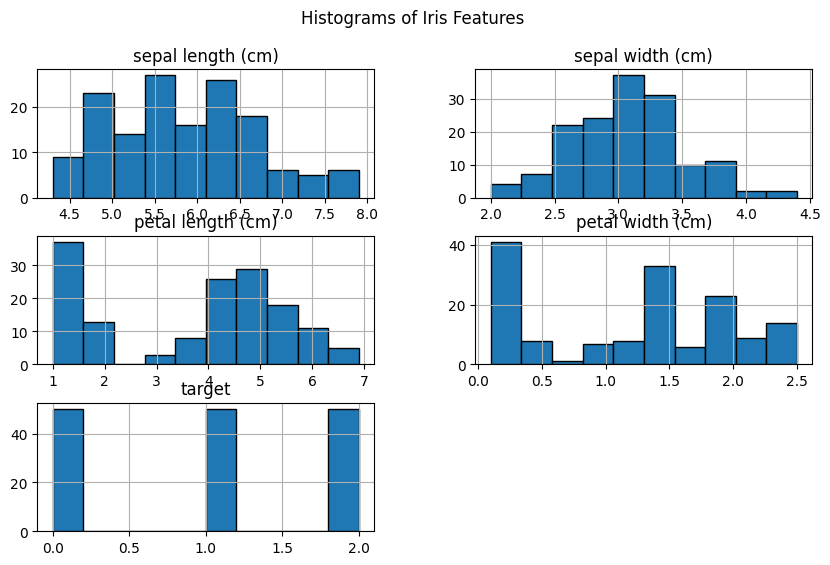

In [65]:
#histograms
data.hist(edgecolor='black', figsize=(10, 6))
plt.suptitle('Histograms of Iris Features') 
plt.show()

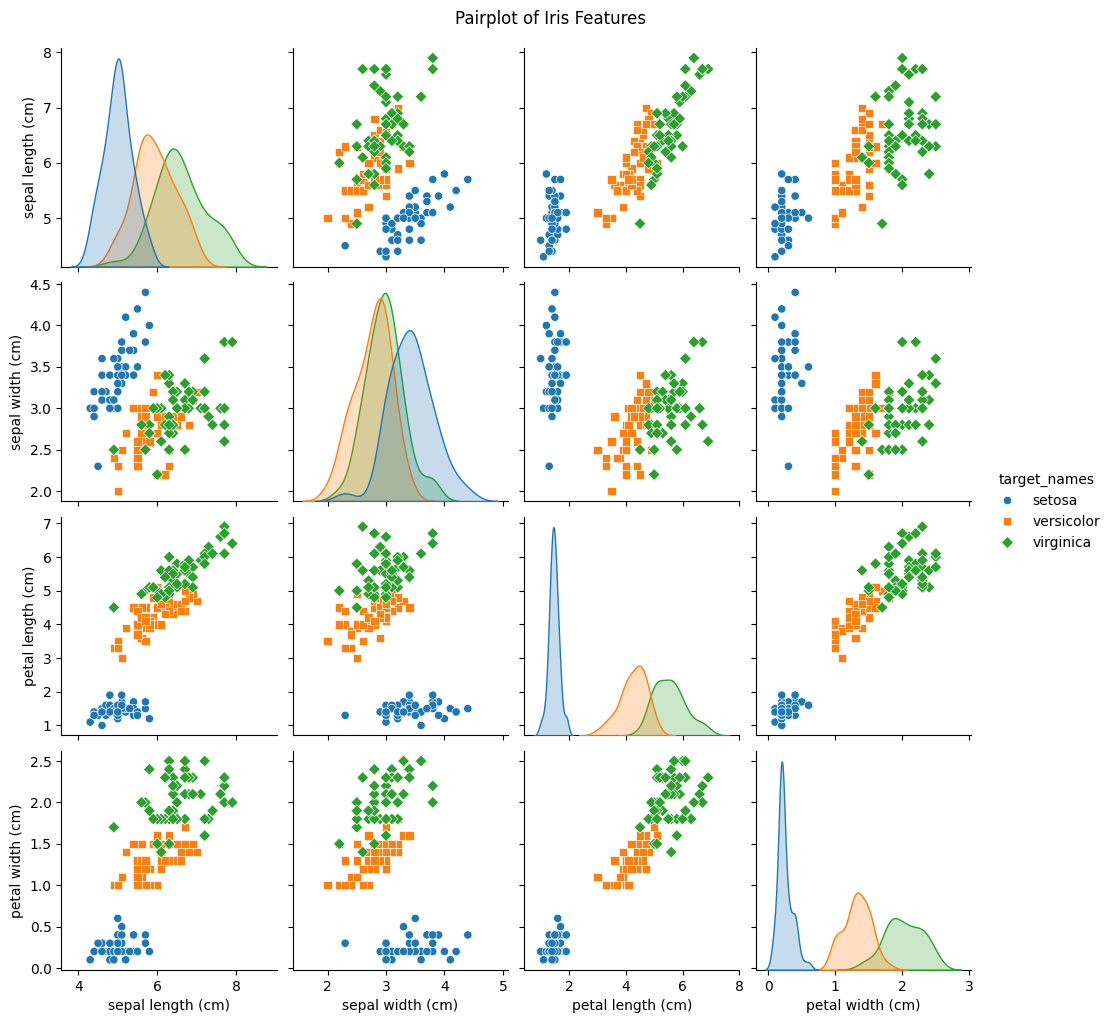

In [66]:
#scatter plot
sns.pairplot(data.drop(['target'], axis=1), hue='target_names', markers=['o', 's', 'D'])
plt.suptitle('Pairplot of Iris Features', y=1.02)
plt.show()

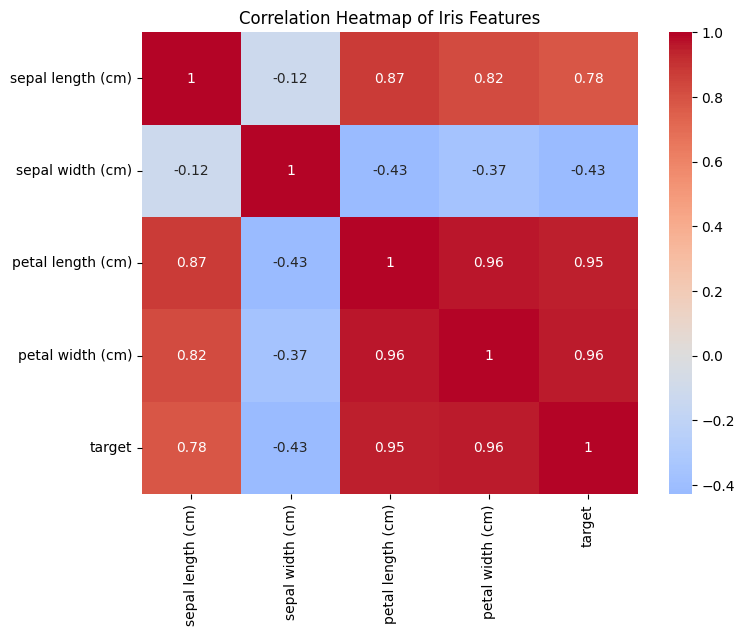

In [68]:
#correlation heatmap
num_features = data.select_dtypes(include=[np.number])  # Select only numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(num_features.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Iris Features')
plt.show()

Model Training

In [ ]:
x = data.drop(['target', 'target_names',], axis=1)
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

#convert x_train, x_test, y_train, y_test to numpy arrays
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()




In [83]:
model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9666666666666667

In [ ]:
target_names = ['setosa', 'versicolor', 'virginica']
numpydata = np.array(data.drop(['target_names'], axis=1)) # Convert dataframe to numpy array    

prediction = model.predict(numpydata[121, 0:4].reshape(1, -1))
prediction_name = target_names[prediction[0]]  # use prediction[0], not prediction
print(f'The predicted class for the input features is: {prediction_name}')



The predicted class for the input features is: virginica
